# Hemin Prajapati |  Data Science 

# Let's Grow More(LGM-VIP)

# Task-1: Decision Tree Algorith

In [88]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [89]:
df=pd.read_csv(r'C:\Users\Suman\Dropbox\My PC (DESKTOP-MSF72QR)\Downloads\drug200.csv')

In [90]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [91]:
df.isna().apply(pd.value_counts).T

,False
Age,200
Sex,200
BP,200
Cholesterol,200
Na_to_K,200
Drug,200


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le=LabelEncoder()

In [94]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [95]:
df['Sex']=le.fit_transform(df['Sex'])

In [96]:
df['Sex'].value_counts()

1    104
0     96
Name: Sex, dtype: int64

In [97]:
df['BP']=le.fit_transform(df['BP'])

In [98]:
df['Cholesterol']=le.fit_transform(df['Cholesterol'])

In [99]:
df['Drug'] = le.fit_transform(df['Drug'])

In [100]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [101]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [102]:
df.isna().apply(pd.value_counts).T

,False
Age,200
Sex,200
BP,200
Cholesterol,200
Na_to_K,200
Drug,200


In [103]:
x=df.drop(['Drug'],axis=1)
y=df[['Drug']]

In [104]:
y.value_counts()

Drug
4       91
3       54
0       23
2       16
1       16
dtype: int64

In [105]:
x.shape

(200, 5)

In [106]:
y.shape

(200, 1)

In [107]:
y.head()

,Drug
0,4
1,2
2,2
3,3
4,4


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [110]:
print(model.feature_importances_)

[0.03351654 0.00513291 0.25207061 0.03045457 0.67882538]


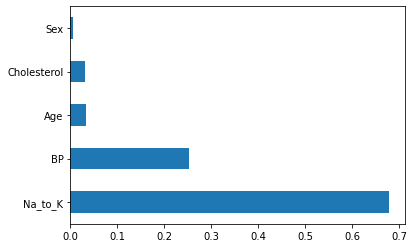

In [111]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

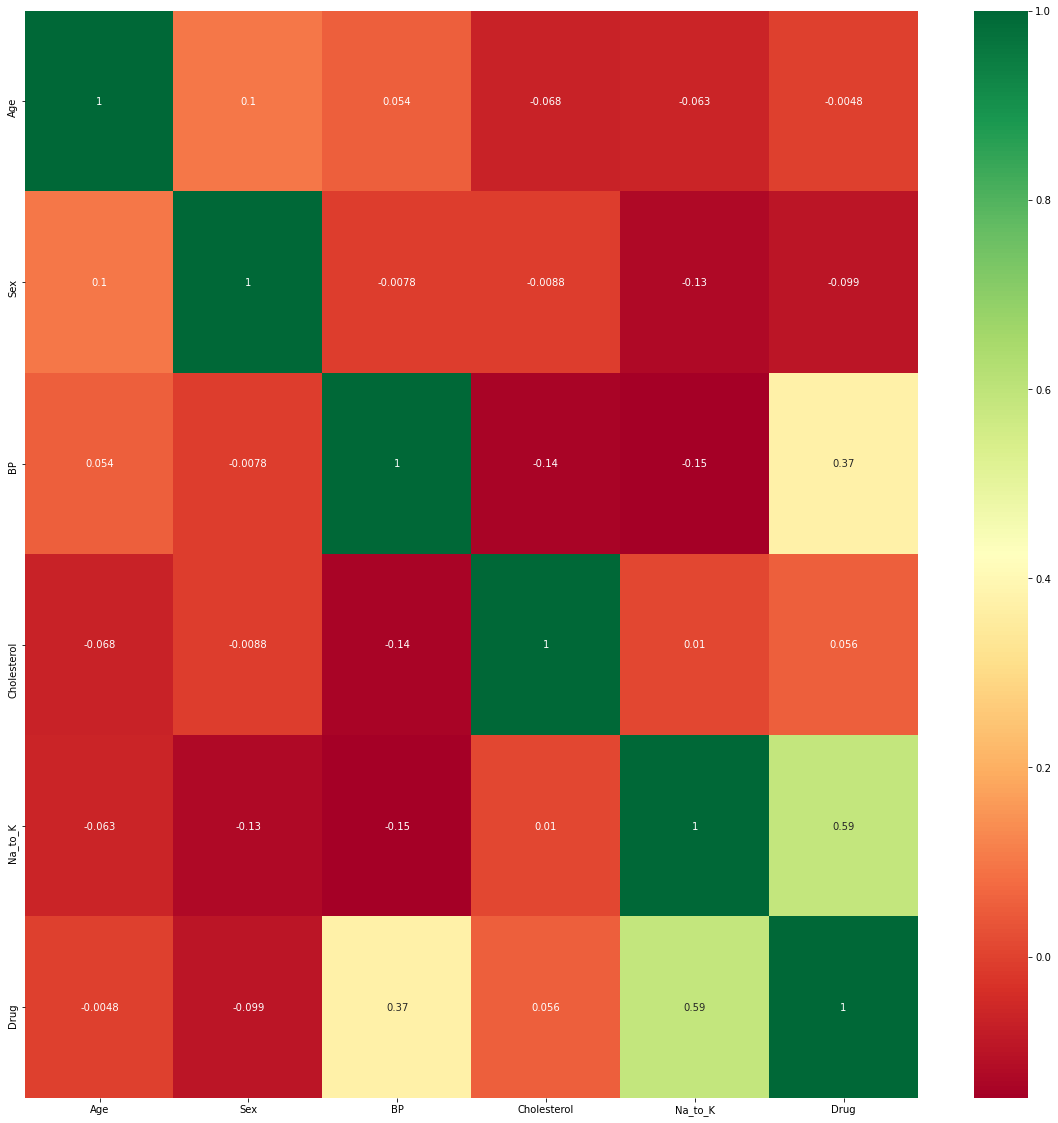

In [112]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [115]:
y_test.value_counts()

Drug
4       27
3       19
1        6
2        4
0        4
dtype: int64

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [118]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [119]:
y_pred=model.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
model.score(x_train,y_train)*100

91.42857142857143

In [122]:
model.score(x_test,y_test)*100

90.0

In [123]:
accuracy_score(y_test,y_pred)*100

90.0

In [124]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6
           2       0.00      0.00      0.00         4
           3       0.83      1.00      0.90        19
           4       1.00      1.00      1.00        27

    accuracy                           0.90        60
   macro avg       0.70      0.73      0.70        60
weighted avg       0.86      0.90      0.87        60



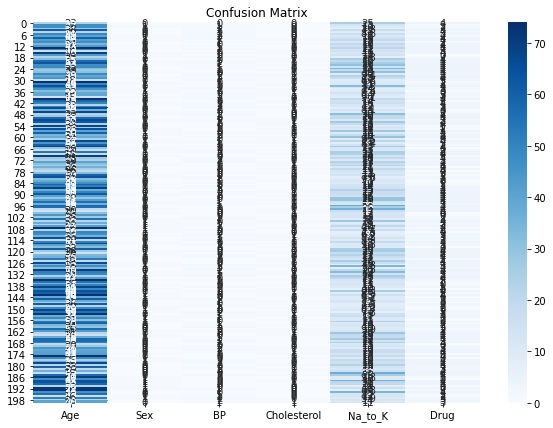

In [126]:
plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sns.heatmap(df,cmap='Blues',annot=True)
plt.show()